<a href="https://colab.research.google.com/github/CodeAvecAsnit/AI/blob/main/KclusterAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```

```

# K MEANS CLUSTERING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

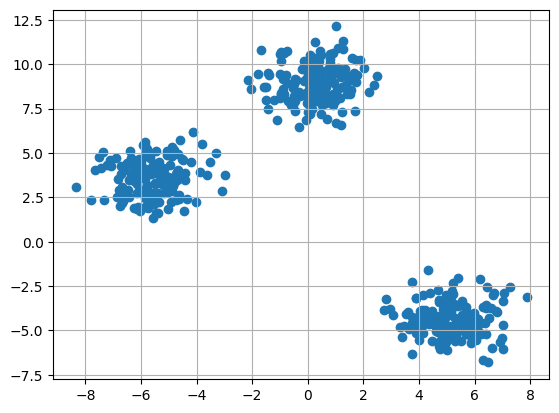

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

plt.figure(0)
plt.grid(True)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

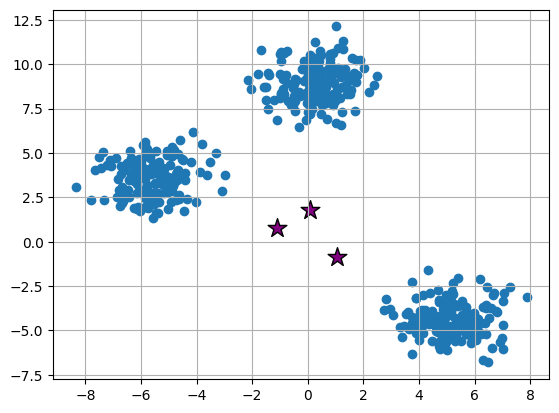

In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2 * (2 * np.random.random((x.shape[1],)) - 1)
    clusters[idx] = {
        'center': center,
        'points': []
    }
plt.scatter(x[:, 0], x[:, 1])
plt.grid(True)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='purple', s=200, edgecolors='black')
plt.show()


In [ ]:
def distance(p1,p2):
  return np.sqrt(np.sum(p1-p2)**2)

In [ ]:
def assign_clusters(x,clusters):
  for idx in range(x.shape[0]):
    dist=[]
    curr_x = x[idx]

    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)
    curr_cluster=np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

In [ ]:
def update_clusters(x,clusters):
  for i in range(k):
    points = np.array(clusters[i]['points'])
    if points.shape[0]>0:
      new_center=points.mean(axis=0)
      clusters[i]['center']=new_center
      clusters[i]['points']=[]
    return clusters

In [ ]:
def predict_cluster(x, clusters):
    pred = []
    for i in range(x.shape[0]):
        dist = []
        for j in clusters:
            dist.append(distance(x[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return np.array(pred)

In [ ]:
clusters=assign_clusters(x,clusters)
clusters=update_clusters(x,clusters)
pred=predict_cluster(x,clusters)

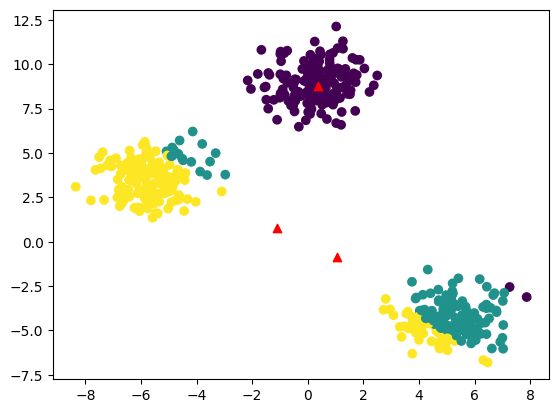

In [ ]:
plt.scatter(x[:,0], x[:,1], c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.show()